In [386]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [387]:
dataset = pd.read_csv("data.csv")

In [388]:
#dataset.drop(labels=range(10000, 20000), axis=0,inplace=True)

In [389]:
dataset.drop(['Salary Range Expected','Job/Higher Studies?','Gentle or Tuff behaviour?','Salary/work'], axis=1,inplace=True)

In [390]:
dataset['Suggested Job Role'] = dataset['Suggested Job Role'].replace(['Database Manager'], 'Database Developer')

In [391]:
 dataset['Suggested Job Role'] = dataset['Suggested Job Role'].replace(['Network Security Engineer'], 'Network Engineer')

In [392]:
 dataset['Suggested Job Role'] = dataset['Suggested Job Role'].replace(['Software Systems Engineer','Solutions Architect'], 'Software Developer')

In [393]:
 dataset['Suggested Job Role'] = dataset['Suggested Job Role'].replace(['Business Systems Analyst', 'Business Intelligence Analyst'], 'Business Analyst')

In [394]:
#dataset['Suggested Job Role'] = dataset['Suggested Job Role'].replace(['Technical Services/Help Desk/Tech Support'], 'Technical Support')

In [395]:
dataset.iloc[:,0:15]

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no


In [396]:
dataset.iloc[:,15:30]

,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,In a Realtionship?
0,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,Web Services,no,no,Prayer books,no
1,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,SAaS services,yes,yes,Childrens,yes
2,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,Sales and Marketing,yes,yes,Travel,no
3,yes,no,python,data science,yes,no,medium,excellent,networks,testing,Testing and Maintainance Services,no,no,Romance,yes
4,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,product development,no,yes,Cookbooks,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,Testing and Maintainance Services,no,yes,Journals,yes
19996,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,Product based,yes,yes,Cookbooks,no
19997,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,SAaS services,yes,yes,Drama,yes
19998,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,Cloud Services,yes,no,Travel,no


In [397]:
dataset.iloc[0:10000,34:35].drop_duplicates()

,Suggested Job Role
0,Database Developer
1,Portal Administrator
3,Systems Security Administrator
4,Business Analyst
5,Software Developer
9,CRM Technical Developer
10,Mobile Applications Developer
11,UX Designer
14,Quality Assurance Associate
15,Web Developer


In [398]:
categorical_col = dataset[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert', 'interested career area ']]
for i in categorical_col:
    print(dataset[i].value_counts(), end="\n\n")

yes    10102
no      9898
Name: self-learning capability?, dtype: int64

no     10049
yes     9951
Name: Extra-courses did, dtype: int64

excellent    6696
poor         6683
medium       6621
Name: reading and writing skills, dtype: int64

poor         6677
excellent    6668
medium       6655
Name: memory capability score, dtype: int64

yes    10036
no      9964
Name: Taken inputs from seniors or elders, dtype: int64

Technical     10047
Management     9953
Name: Management or Technical, dtype: int64

smart worker    10047
hard worker      9953
Name: hard/smart worker, dtype: int64

no     10054
yes     9946
Name: worked in teams ever?, dtype: int64

yes    10097
no      9903
Name: Introvert, dtype: int64

testing                     3354
system developer            3349
cloud computing             3343
security                    3328
Business process analyst    3321
developer                   3305
Name: interested career area , dtype: int64



In [399]:
dataset.isnull().sum(axis=0)

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Suggested Job Role', ylabel='count'>

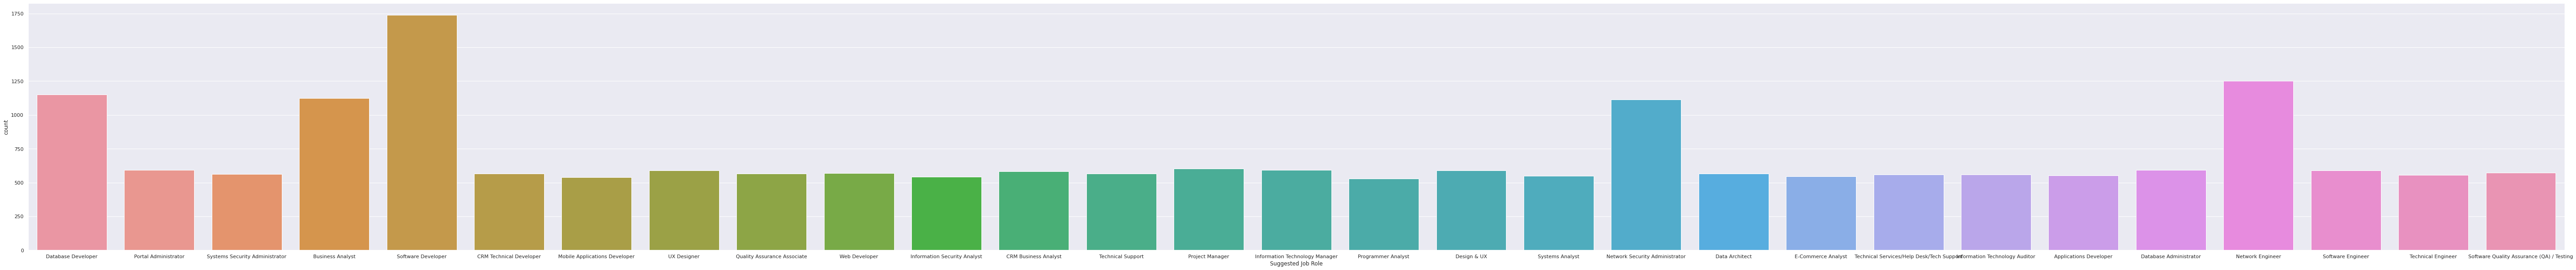

In [401]:
sns.set(rc={'figure.figsize':(100,10)})
sns.countplot(x = dataset["Suggested Job Role"])

<AxesSubplot:xlabel='lab'>

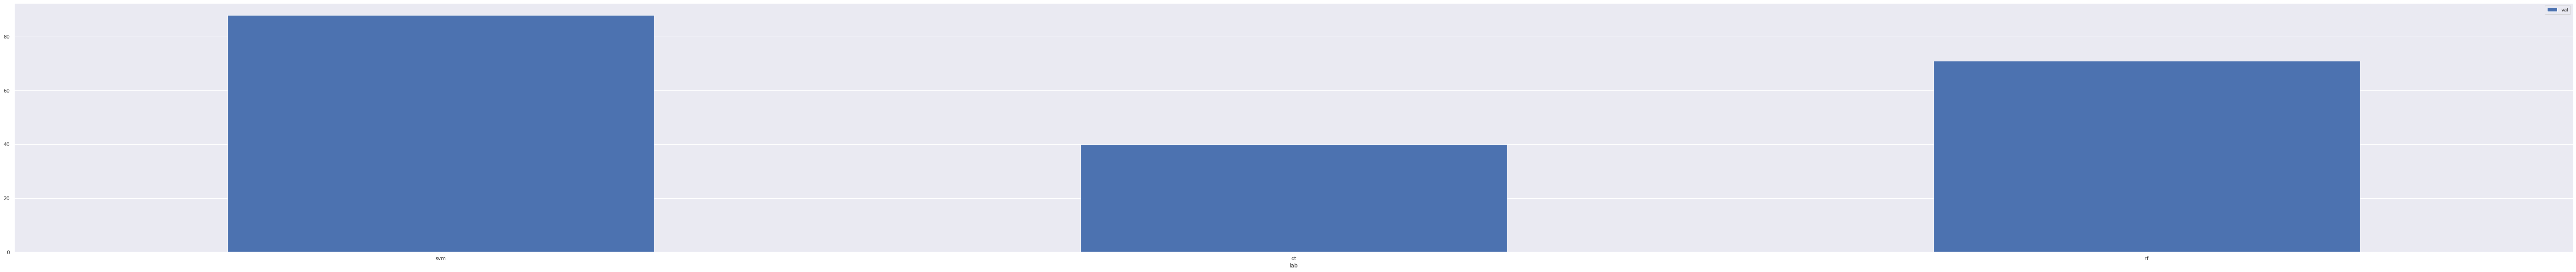

In [446]:
#accuracy=[88.989548,34.653423,72.2325]
#model:['svm','dt','rf']
#df2=pd.DataFrame({'model':model,'accuracy':accuracy})
#df2.plot.bar(x='accuracy',rot=0)

df = pd.DataFrame({'lab':['svm','dt','rf'], 'val':[88, 40, 71]})
df.plot.bar(x='lab', y='val', rot=0)

In [402]:
print(dataset["Interested Type of Books"].value_counts())

Guide                    1172
Health                   1165
Self help                1151
Horror                   1133
Autobiographies           615
Fantasy                   613
Satire                    598
Biographies               589
Comics                    589
Poetry                    588
Encyclopedias             588
Prayer books              586
Anthology                 585
Science fiction           580
Art                       575
History                   572
Mystery                   569
Diaries                   566
Drama                     566
Childrens                 564
Travel                    563
Religion-Spirituality     562
Action and Adventure      557
Trilogy                   555
Dictionaries              554
Romance                   553
Science                   550
Series                    548
Cookbooks                 542
Journals                  535
Math                      517
Name: Interested Type of Books, dtype: int64


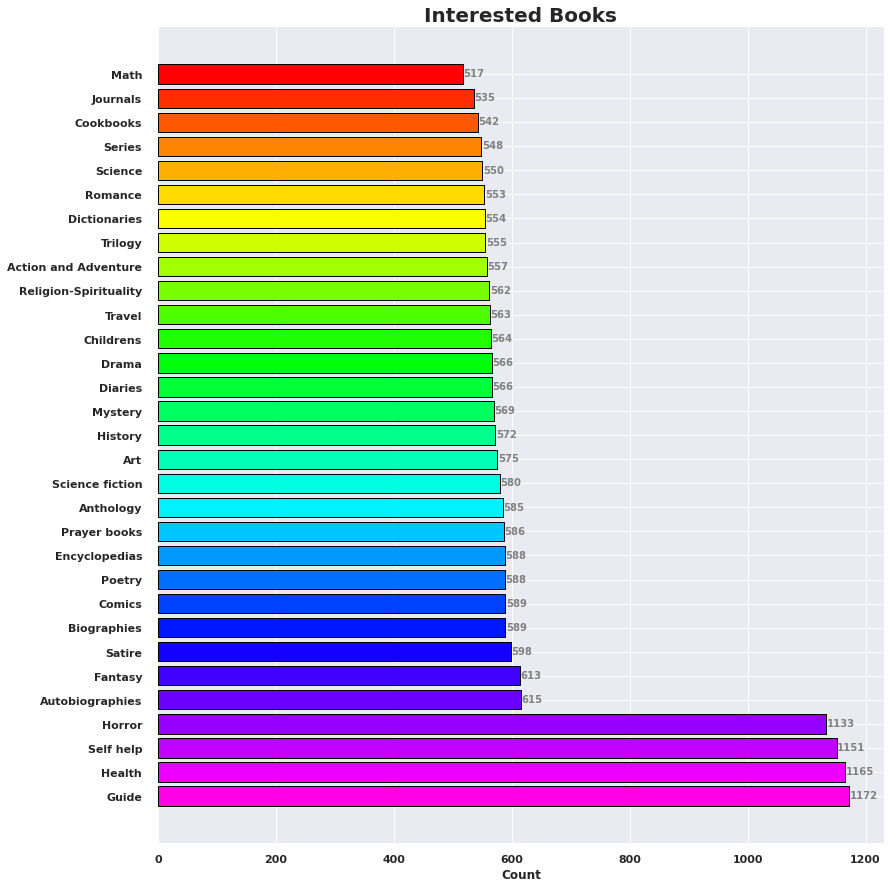

In [403]:
# Figure Size and DPI(Dots per pixels)
fig, ax = plt.subplots(figsize=(13,15))

# Horizontal Bar Plot
title_cnt=dataset["Interested Type of Books"].value_counts().sort_values(ascending=True).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('gist_rainbow',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

 #Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

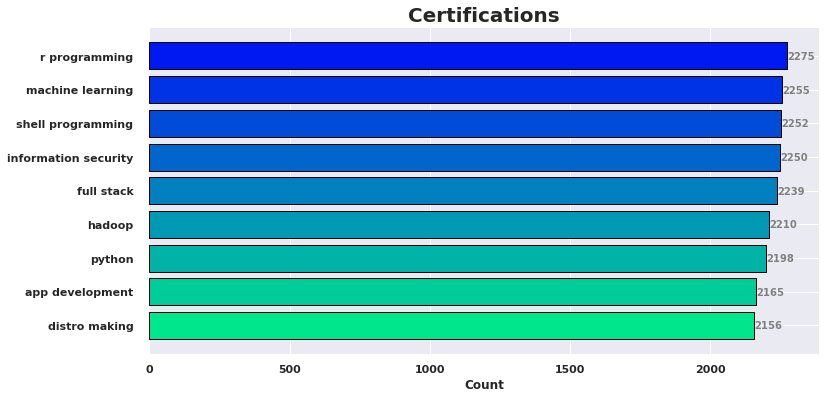

In [413]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=dataset.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('winter',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

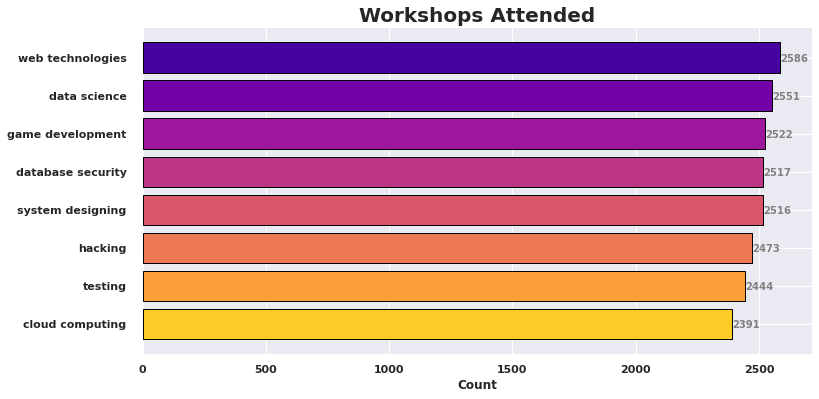

In [410]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=dataset.workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('plasma',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

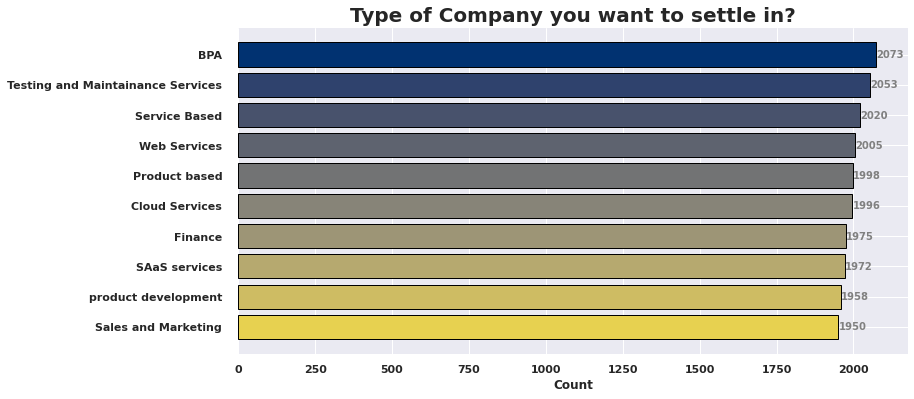

In [411]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=dataset["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('cividis',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

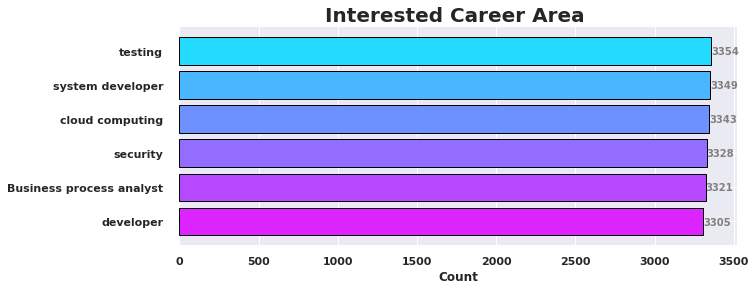

In [412]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=dataset["interested career area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('cool',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [ ]:
cols = dataset[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert",'can work long time before system?','talenttests taken?','olympiads','interested in games','In a Realtionship?']]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    dataset = dataset.replace(cleanup_nums)

In [ ]:
mycol = dataset[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    dataset = dataset.replace(cleanup_nums)

category_cols = dataset[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books']]
for i in category_cols:
    dataset[i] = dataset[i].astype('category')
    dataset[i + "_code"] = dataset[i].cat.codes

print("\n\nList of Categorical features: \n" , dataset.select_dtypes(include=['object']).columns.tolist())

In [ ]:
dataset.head()

In [ ]:
dataset = pd.get_dummies(dataset, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])

In [ ]:
dataset.head()

In [ ]:
print("List of Numerical Columns: \n" , dataset.select_dtypes(include=np.number).columns.tolist())

In [ ]:
major=pd.DataFrame(dataset,columns=['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'interested in games', 'In a Realtionship?', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code', 'A_Management', 'A_Technical', 'B_hard worker', 'B_smart worker'])

In [ ]:
major.head()

In [ ]:
y=pd.DataFrame(dataset,columns=["Suggested Job Role"])

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(major,y,test_size=0.4,random_state=42)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test,pred)


#
print(svm_accuracy*10)

In [ ]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
cm = classification_report(y_test,rfc_pred)
accuracy = accuracy_score(y_test,rfc_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

In [ ]:
features = [[0,1,2,3,5,53,95,99,100,5,6,7,8,6,1,0,1,4,4,0,1,1,1,9,3,4,0,0,0,0]]
prediction = rfc.predict(features)
print(prediction)

features = [[84,53,76,92,65,53,55,75,85,5,6,7,8,6,0,0,0,4,4,0,0,0,0,2,3,4,0,0,0,0]]
prediction = rfc.predict(features)
print(prediction)

In [ ]:

features = [[8,53,76,92,65,53,55,75,85,12,7,7,8,6,0,0,0,3,3,0,0,0,0,9,3,5,0,0,0,0]]
prediction = rfc.predict(features)
print(prediction)

In [ ]:
features = [[10,10,7,2,69,96,55,7,2,12,3,7,7,8,1,1,0,4,4,1,0,1,0,4,3,8,0,0,0,0]]
prediction = svm.predict(features)
print(prediction)